In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import psycopg2
import pandas as pd
import numpy as np
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv(usecwd=True))

HOST = os.getenv("HOST")
PORT = os.getenv("PORT",5432)
DBNAME = os.getenv("DBNAME")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")

conn = psycopg2.connect(f"host={HOST} port={PORT} dbname={DBNAME} user={USER} password={PASSWORD} gssencmode=disable") 


def getTableData(conn, table_name):
    try:
        cur = conn.cursor()
        cur.execute(f"""select * from {table_name}""")
        df = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])
        return df
    except Exception as e:
        print(e)

    finally:
        cur.close()

long = getTableData(conn, 'longitudinal_oasis')
long["sex"] = long["sex"].replace({False:'Male', True:'Female'})
# long.head()

# print((sns.color_palette("crest").as_hex()))

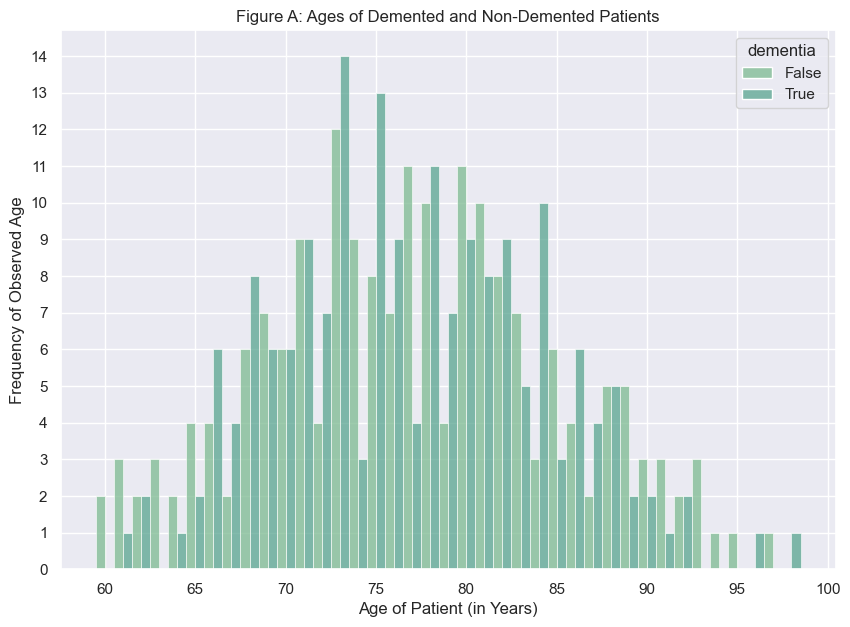

In [84]:
sns.set_theme(style="darkgrid", palette="crest")
colors = sns.color_palette('crest', n_colors = 5) #cmap for discrete

fig = sns.histplot(x=long['age'], hue=long["dementia"], multiple="dodge", discrete=True)
fig.figure.set_size_inches(10,7)

plt.title("Figure A: Ages of Demented and Non-Demented Patients")
fig.set(ylabel="Frequency of Observed Age", xlabel="Age of Patient (in Years)", yticks=np.arange(0,15))
plt.show()

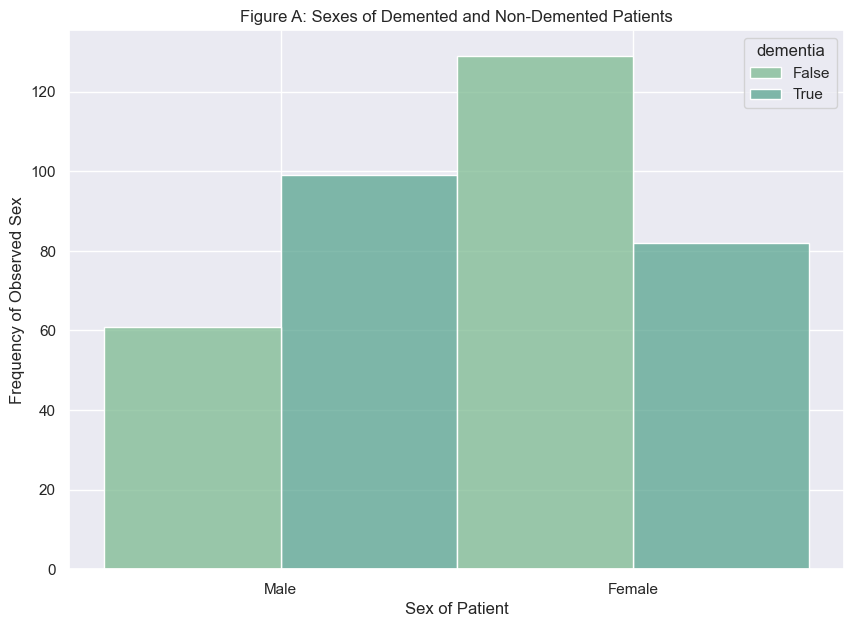

In [76]:
fig = sns.histplot(x=long['sex'], hue=long["dementia"], multiple="dodge", discrete=True)
fig.figure.set_size_inches(10,7)

plt.title("Figure B: Sexes of Demented and Non-Demented Patients")
fig.set(ylabel="Frequency of Observed Sex", xlabel="Sex of Patient")
plt.show()

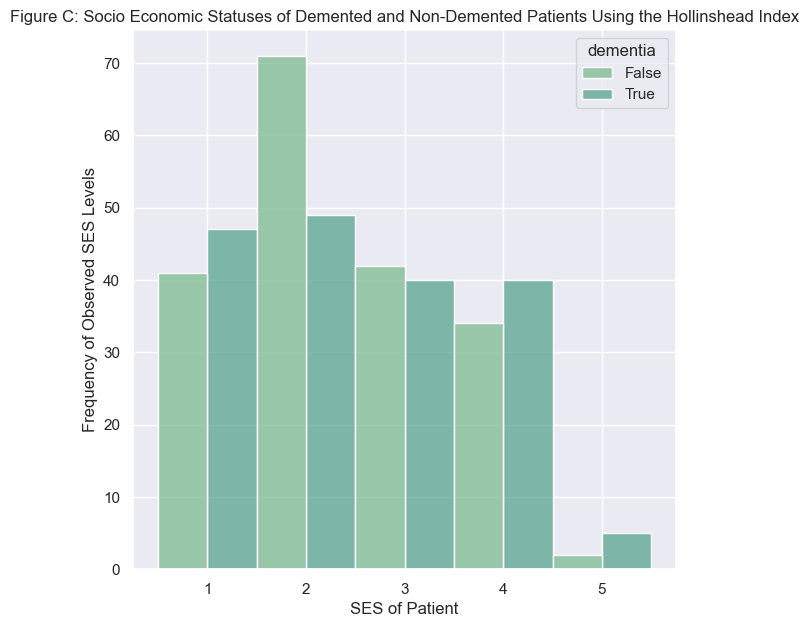

In [88]:
fig = sns.histplot(x=long['ses'], hue=long["dementia"], multiple="dodge", discrete=True)
fig.figure.set_size_inches(7,7)

plt.title("Figure C: Socio Economic Statuses of Demented and Non-Demented Patients Using the Hollinshead Index")
fig.set(ylabel="Frequency of Observed SES Levels", xlabel="SES of Patient")
plt.show()

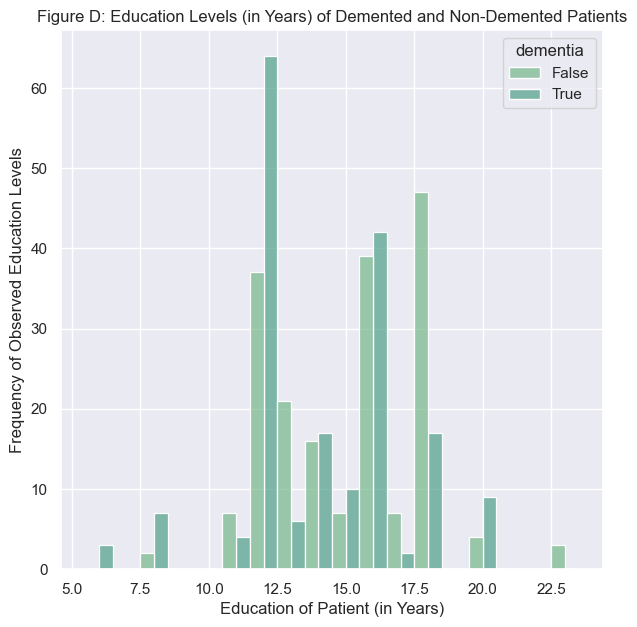

In [92]:
fig = sns.histplot(x=long['education_years'], hue=long["dementia"], multiple="dodge", discrete=True)
fig.figure.set_size_inches(7,7)

plt.title("Figure D: Education Levels (in Years) of Demented and Non-Demented Patients")
fig.set(ylabel="Frequency of Observed Education Levels", xlabel="Education of Patient (in Years)")
plt.show()

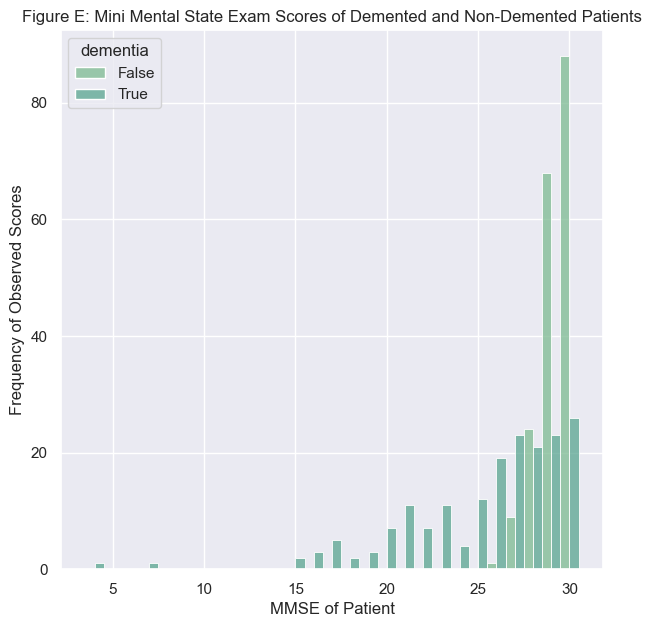

In [93]:
fig = sns.histplot(x=long['mmse'], hue=long["dementia"], multiple="dodge", discrete=True)
fig.figure.set_size_inches(7,7)

plt.title("Figure E: Mini Mental State Exam Scores of Demented and Non-Demented Patients")
fig.set(ylabel="Frequency of Observed Scores", xlabel="MMSE of Patient")
plt.show()

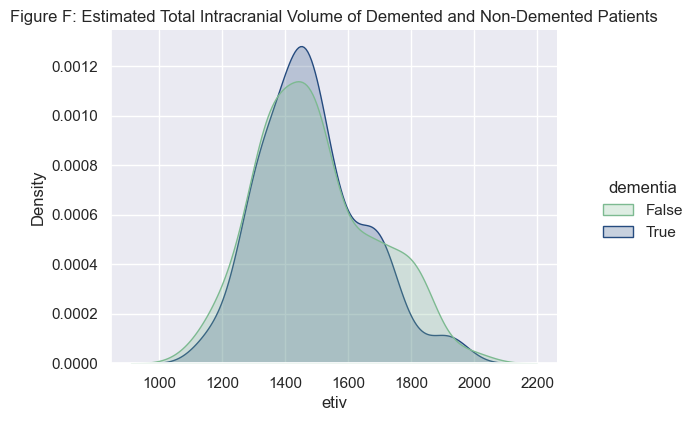

In [138]:
#TODO: Make not discrete?
cont_pal=['#7dba91','#254b7f']

fig = sns.displot(x=long['etiv'], hue=long["dementia"], kind="kde", fill=True, palette=cont_pal)
fig.figure.set_size_inches(7,4)

plt.title("Figure F: Estimated Total Intracranial Volume of Demented and Non-Demented Patients")
# fig.set(ylabel="Frequency of Observed ETIVs", xlabel="ETIV of Patient", yticks=np.arange(0,3))
plt.show()

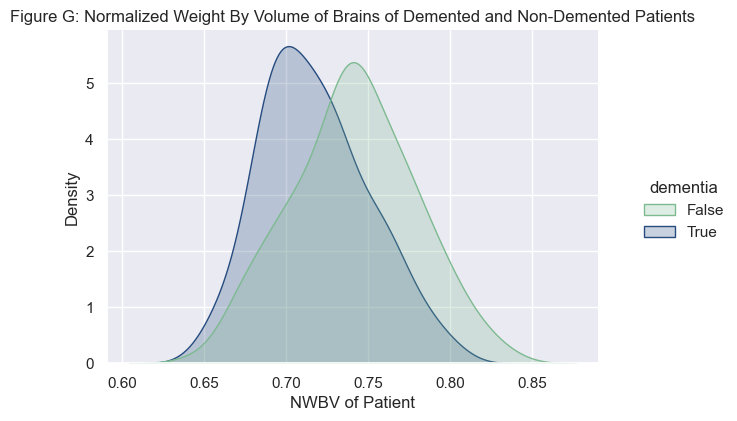

In [137]:
#TODO: Make not discrete?
fig = sns.displot(x=long['nwbv'], hue=long["dementia"], kind="kde", fill=True, palette=cont_pal)
fig.figure.set_size_inches(7,4)

plt.title("Figure G: Normalized Weight By Volume of Brains of Demented and Non-Demented Patients")
fig.set(ylabel="Density", xlabel="NWBV of Patient")
plt.show()

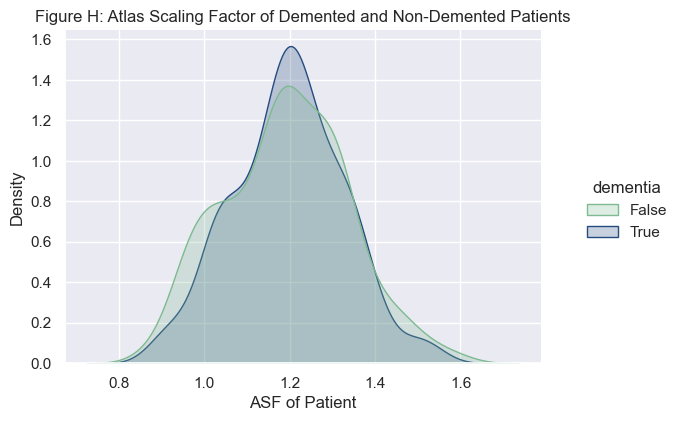

In [136]:
#TODO: Make not discrete?
fig = sns.displot(x=long['asf'], hue=long["dementia"], kind="kde", fill=True, palette=cont_pal)
fig.figure.set_size_inches(7,4)

plt.title("Figure H: Atlas Scaling Factor of Demented and Non-Demented Patients")
fig.set(ylabel="Density", xlabel="ASF of Patient")
plt.show()